In [1]:
import pandas as pd
import glob
import json


In [37]:


# get data file names

figure_meta = {
    'key_path': 'log_dir/csvs/avg_cost', # updateloss, testreward, LR, avg_cost
    'key_paths': ['log_dir/csvs/avg_cost', 'log_dir/csvs/avg_cost', 'log_dir/csvs/avg_cost', 'log_dir/csvs/avg_cost', 'log_dir/csvs/testreward', 'log_dir/csvs/testreward', 'log_dir/csvs/testreward', 'log_dir/csvs/testreward'],
    'y_df_label': 'update/loss',
    'y_df_labels': ['avg_cost', 'avg_cost', 'avg_cost', 'avg_cost', 'test/reward', 'test/reward', 'test/reward', 'test/reward'],
    'invert_y': [False, False, False, False, True, True, True, True],
    'x_df_label': 'Steps',
    'y_display_label': 'average solution length',
    'x_display_label': 'number of samples trained',
    'run_names': ["run_20220322T141409", "run_20220322T142703", "run_20220322T142725", "run_20220322T142733", "run_080__20220404T110229", "run_080__20220404T224918", "run_081__20220404T224610", "run_081__20220405T101150"],
    'line_names': ["run_20220322T141409", "run_20220322T142703", "run_20220322T142725", "run_20220322T142733", "run_080__20220404T110229", "run_080__20220404T224918", "run_081__20220404T224610", "run_081__20220405T101150"],
    'plot_filename': 'PPO_vs_Kool'
}

#with open('figure_metas/original_baselines.json') as json_file:
#    figure_meta = json.load(json_file)


filenames = figure_meta['run_names']
x_df_label = figure_meta['x_df_label']
y_display_label = figure_meta['y_display_label']
x_display_label = figure_meta['x_display_label']
plot_names = figure_meta['line_names']

plot_dfs = []
filepaths = []
if 'key_paths' in figure_meta.keys() and len(figure_meta['key_paths']) > 0:
    assert(len(figure_meta['key_paths']) == len(filenames))
    y_df_labels = figure_meta['y_df_labels']
    invert_y = figure_meta['invert_y']
    for path_str, filename in zip(figure_meta['key_paths'], filenames):
        filepaths.append(path_str + "/" + filename + ".csv")
else:
    path = figure_meta['key_path']
    filepaths = [path + "/" + filename + ".csv" for filename in filenames]
    invert_y = [False] * len(filepaths)
    y_df_labels = [figure_meta['y_df_label']] * len(filepaths)
    
for i, filepath in enumerate(filepaths):
    df = pd.read_csv(filepath, sep=';')
    if invert_y[i]:
        df[y_df_labels[i]] = -df[y_df_labels[i]]
    plot_dfs.append(df)

In [39]:
# https://plotly.com/python/plot-data-from-csv/
# https://stackoverflow.com/questions/64500472/plot-multiple-pandas-dataframes-in-one-graph-python-plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.mathjax = None # https://github.com/plotly/plotly.py/issues/3469

fig = go.Figure()
for i, (name, df) in enumerate(zip(plot_names, plot_dfs)):
    fig = fig.add_trace(go.Scatter(x = df[x_df_label],
                                   y = df[y_df_labels[i]], 
                                   name = name))

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=70,
        r=70,
        b=30,
        t=30,
        pad=4
    ),
    yaxis=dict(
        title_text=y_display_label,
        range=(3.84, 4.1),
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    xaxis=dict(
        title_text=x_display_label,
        range=(0, 100_000_000),
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    title=dict(
        #text=title,
    ),
    paper_bgcolor="LightSteelBlue",
)
# https://plotly.com/python/horizontal-vertical-shapes/
#fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal", annotation_position="bottom right")
fig.update_yaxes(rangemode="tozero")
fig.show()
fig.write_image("figures/" + figure_meta['plot_filename'] + ".pdf")


with open("figure_metas/" + figure_meta['plot_filename'] + ".json", "w") as fp:
    json.dump(figure_meta,fp)
    

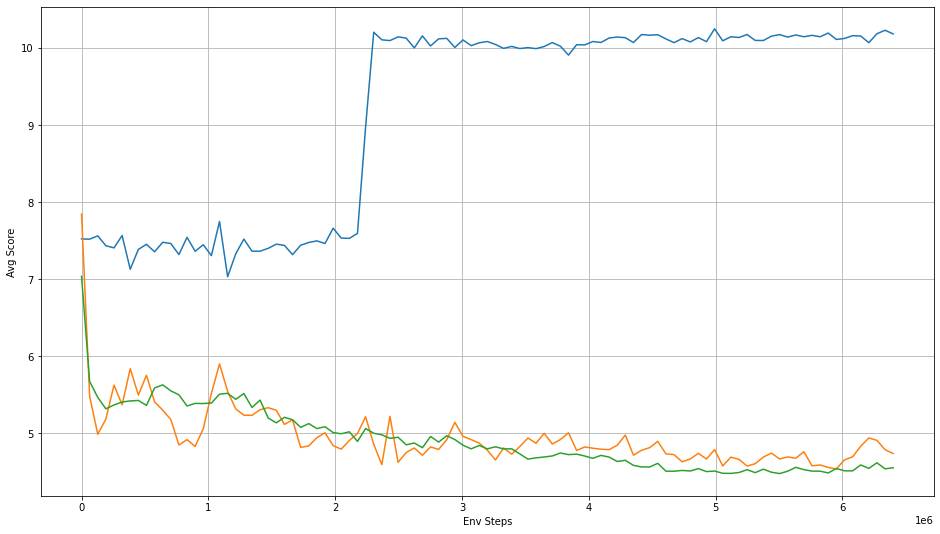

In [24]:
import matplotlib.pyplot as plt
import numpy as np
x_name = 'Steps'
y_name = 'test/reward'
fig, ax = plt.subplots()
plt.plot(df1[x_name], df1[y_name])
plt.plot(df2[x_name], df2[y_name])
plt.plot(df3[x_name], df3[y_name])

ax.set(xlabel='Env Steps', ylabel='Avg Score')
#ax.set_ylim(ymin=0)
ax.grid()

fig.set_size_inches(16, 9)
#fig.savefig("test.png")
plt.show()

In [ ]:
# !pip install -U kaleido